# 2. Computer Graphics 2D

## 2.1.  Geometric transformation 

Geometric transformations can be used to position objects, i.e. to shift them to another position or to rotate them, to change the shape of objects.

The most important geometric transformations are:

- scaling, 
- rotation, 
- shearing, 
- and translation.

### 2.1.1. Scaling

Scaling leads to stretching or shrinking of objects in the direction of the $x-$ and the $y-axis$. A scaling $𝑆(𝑠_𝑥, 𝑠_𝑦)$ maps the point $(𝑥,𝑦)$ to the point $(𝑥’, 𝑦’)$ given by

$\begin{pmatrix}
x' \\
y'
\end{pmatrix} = 
\begin{pmatrix}
s_x \cdot x \\
s_y \cdot y
\end{pmatrix} =
\begin{pmatrix}
s_x & 0 \\
0 & s_y
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y
\end{pmatrix}
$

Example
$s_x = 2$ and $s_y = 0.5$

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

In [2]:
colors = {'blue': (255, 0, 0), 'green': (0, 255, 0), 'red': (0, 0, 255), 'yellow': (0, 255, 255), 'magenta': (255, 0, 255), 'cyan': (255, 255, 0), 'white': (255, 255, 255), 'black': (0, 0, 0), 'gray': (125, 125, 125), 'rand': np.random.randint(0, high=256, size=(3,)).tolist(), 'dark_gray': (50, 50, 50), 'light_gray': (220, 220, 220)}
print(colors['magenta'])

(255, 0, 255)


In [3]:
image = np.zeros((400, 400, 3), dtype="uint8")
image[:] = colors['light_gray']

In [4]:
def show_with_matplotlib(img, title):
    img_RGB = img[:,:,::-1]
    
    plt.imshow(img_RGB)
    plt.title(title)
    plt.show()

In [7]:
def draw_float_rectangle(img, point1, point2, color, thickness=1, lineType=8, shift=4):
    factor = 2 ** shift

    point1 = int(round(point1[0] * factor)), int(round(point1[1] * factor))
    point2 = int(round(point2[0] * factor)), int(round(point2[1] * factor))
    
    cv2.rectangle(img, point1, point2, color, thickness, lineType, shift)

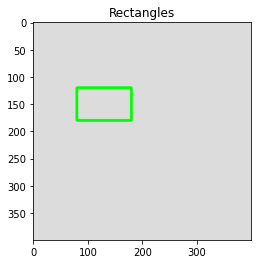

In [8]:
#cv2.rectangle(image, (80, 120), (180, 180), colors['green'], 3)
draw_float_rectangle(image, (80, 120), (180, 180), colors['green'], 3, 8, 1)
show_with_matplotlib(image, 'Rectangles')

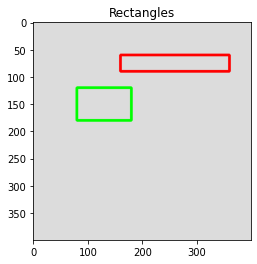

In [9]:
#cv2.rectangle(image, (80*2, 120*0.5), (180*2, 180*0.5), colors['green'], 3)

draw_float_rectangle(image, (80 * 2, 120 * 0.5), (180 * 2, 180 * 0.5), colors['red'], 3, 8, 1)
show_with_matplotlib(image, 'Rectangles')

A scaling is always carried out with respect to the origin of the coordinate system. 

Applying a scaling to an object that is not centred around the origin of the coordinate system will lead to a translation of the (centre of the) object in addition to the scaling.

### 2.2.2. Rotations

The rotation $R(\theta)$ by the angle $\theta$  maps the point $(x, y)$  to the point $(x', y')$ given by.

$\begin{pmatrix}
x' \\
y'
\end{pmatrix} = 
\begin{pmatrix}
x \cdot cos(\theta) - y \cdot sin(\theta) \\
x \cdot sin(\theta) + y \cdot cos(\theta)
\end{pmatrix} =
\begin{pmatrix}
cos(\theta) & -sin(\theta) \\
sin(\theta) &  cos(\theta)
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y
\end{pmatrix}
$

- Anticlockwise in case of a positive angle
- Clockwise in case of a negative angle

Example
$\theta = 45^{\circ}$

In [10]:
def draw_float_polylines(img, pts, color, thickness=1, lineType=8, shift=4):
    factor = 2 ** shift
    pts = pts * factor
    pts = np.round(pts)
    pts = pts.astype(int)
    cv2.polylines(img, [pts], True, color, thickness, lineType, shift)


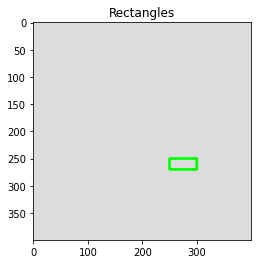

In [11]:
image = np.zeros((400, 400, 3), dtype="uint8")
image[:] = colors['light_gray']


#draw_float_rectangle(image, (150, 150), (350, 200), colors['green'], 3, 8, 1)
#show_with_matplotlib(image, 'Rectangles')

pts = np.array([[250, 250], [250, 270], [300, 270], [300, 250]], np.int32)
pts = pts.reshape((-1, 1, 2))

draw_float_polylines(image, pts, colors['green'], thickness=4, lineType=8, shift=1)
show_with_matplotlib(image, 'Rectangles')

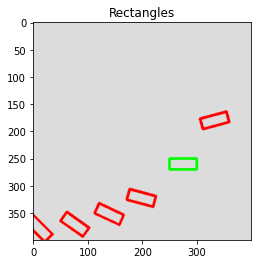

In [16]:
import math
import numpy as np

theta = -15
theta = math.radians(theta)
rotation = np.array([math.cos(theta), math.sin(theta), -1 * math.sin(theta), math.cos(theta)]).reshape(2,2)

pts_ = pts @ rotation

draw_float_polylines(image, pts_, colors['red'], thickness=4, lineType=8, shift=1)
show_with_matplotlib(image, 'Rectangles')

### 2.2.3. Shear transformation

Applying a shear transformation $Sh(s_x,s_y)$ to a point $(x,y)$ yields the point $(x',y')$ with the new coordinates

$\begin{pmatrix}
x' \\
y'
\end{pmatrix} = 
\begin{pmatrix}
x+s_x \cdot y \\
y+s_y \cdot x
\end{pmatrix} =
\begin{pmatrix}
1 & s_x\\
s_y & 1
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y
\end{pmatrix}
$

In [17]:
image = np.zeros((400, 400, 3), dtype="uint8")
image[:] = colors['light_gray']

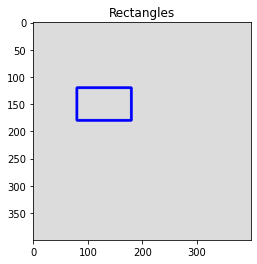

In [18]:
#draw_float_rectangle(image, (80, 120), (180, 180), colors['green'], 3, 8, 1)
#show_with_matplotlib(image, 'Rectangles')

pts = np.array([[80, 120], [80, 180], [180, 180], [180, 120]], np.int32)
pts = pts.reshape((-1, 1, 2))

draw_float_polylines(image, pts, colors['blue'], thickness=4, lineType=8, shift=1)
show_with_matplotlib(image, 'Rectangles')

example of sharing $s_x = 1$ and $s_y = 0$

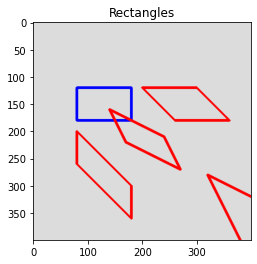

In [22]:
sx = 0
sy = 1

sharing = np.array([1, sy, sx, 1]).reshape(2,2)
pts_ = pts @ sharing

draw_float_polylines(image, pts_, colors['red'], thickness=4, lineType=8, shift=1)
show_with_matplotlib(image, 'Rectangles')

### 2.2.3. Translation

A translation $T(d_x , d_y )$ causes a shift by the vector $d = (dx , dy )$ . This means the translation maps the point $(x, y)^\top$ to the point

$\begin{pmatrix}
x' \\
y'
\end{pmatrix} = 
\begin{pmatrix}
x+d_x \\
y+d_y
\end{pmatrix} =
\begin{pmatrix}
x \\
y
\end{pmatrix} +
\begin{pmatrix}
d_x \\
d_y
\end{pmatrix}
$

Example = $d = (140, 80)^\top$

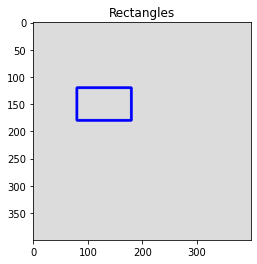

In [23]:
image = np.zeros((400, 400, 3), dtype="uint8")
image[:] = colors['light_gray']

pts = np.array([[80, 120], [80, 180], [180, 180], [180, 120]], np.int32)
pts = pts.reshape((-1, 1, 2))

draw_float_polylines(image, pts, colors['blue'], thickness=4, lineType=8, shift=1)
show_with_matplotlib(image, 'Rectangles')

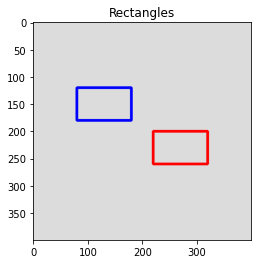

In [24]:
dx = 140
dy = 80
translation = np.array([dx, dy]).reshape(1,2)

pts_ = pts + translation

draw_float_polylines(image, pts_, colors['red'], thickness=4, lineType=8, shift=1)
show_with_matplotlib(image, 'Rectangles')

## 2.2. Homogeneous Coordinates

Homogeneous coordinates use an additional dimension for the representation of points. The point $(x,y,z)$ in homogeneous coordinates is identified with the point $( x/z , y/z )$ in Cartesian coordinates. 

 The z-component of a point in homogeneous coordinates must not be zero.
 
 When the point $(x_0,y_0)$ in Cartesian coordinates has to be transformed into homogeneous coordinates, the representation (x_0,y_0,1) can be used.

## 2.3. Drawing curves